In [6]:
import hoi4_civ_calculator as calc
#I set this for Germany, strategy: rhineland, then go for some econ focuses, rush con 3 
# -rough est of day get, dispersed ind
#My Day 1 actually produces stuff, which represents Jan 2, 1936 (or any day you configure this for)

#general construction speed
#(must have first day) 2nd val must be cumulative
speed_mod = [(1, 1.05), (154,1.15), (272,1.25), (int(27*30.42),1.35)]
unique_spd_mod = {'civ': [(1,0), (140,.1), (210,.2), (int(29*30.42),0)], 
                  #hire advisor month 5, fire advisor month 30
                  'civ_con': [(1,0), (140,.1), (210,.2), (int(18*30.42),.3), (int(29*30.42),.2)],
                  'mil': [(1,.35), (178,.45), (210,.55), (int(18*30.42),.65)],
                  'mil_con': [(1,.35), (178,.45), (210,.55), (int(18*30.42),.85)], 
                  #many mil bonuses also apply -add them here too
                  'ref': [(1,.15), (140,.25), (int(29*30.42),.15)],
                  'inf': [(1,0), (140,.1), (int(29*30.42),0)],
                  'doc': [(1,.25), (178,.35), (210,.45)]} # these are all added to speed_mod
unique_cost_mod = {'civ': [(1,1)], # these are the total mods
                  'civ_con': [(1,0.9), (int(18*30.42),0.8)],
                  'mil': [(1,1)],
                  'mil_con': [(1,0.9), (int(18*30.42),0.8)],
                  'ref': [(1,1)],
                  'inf': [(1,1)],
                  'doc': [(1,1)]}
free_stuff = {'civ': {calc.ymd_to_day(1936,'oct',8):6, calc.ymd_to_day(1936,'dec',17):6, 
                      int(26*30.42):12, int(29*30.42):3, int(33*30.42):8}, 
              # in case of conquering or focus #Austria & czech civ guess
              #not sure about trade
              'mil': {int(15*30.42):6, int(26*30.42):7, int(29*30.42):3, int(33*30.42):5}, 
              #key is day had thing at end of day
              'ref': {},
              'inf': {calc.ymd_to_day(1937,'feb',25):{'brandenburg': 2, 'hannover': 3, 'thuringen': 4, 'franken': 3}},
              'doc': {}}
space_mod = [(1,1), (262,1.2), (int(18*30.42),1.4), (int(37*30.42),1.6)] 
#ind tech for max factories
    
con_goods = [(1, 0.2-(.84-.5)*2*.05)] #1st val is day
#also depends on stab
daily_reports = [{'civ': 32, 'mil': 28, 'ref': 0, 'doc': 10, 'goods': 9}]

#state, inf mod, max fact, present fact
inf = {'moselland': [1.7, 10, 3],'rhineland': [1.8, 10, 5], 'brandenburg': [1.8, 12, 9],
       'wurttemberg': [1.8, 8, 6],'sachsen': [1.7, 10, 9],'hannover': [1.7, 8, 5]
       ,'thuringen': [1.6, 8, 1],'franken': [1.7, 6, 2], 'westfalen': [1.8, 8, 4],
       'hessen': [1.7, 8, 3], 'oberbayern': [1.7, 6, 3], 'niederbayern': [1.6, 6, 0],
      'niederschlesien': [1.6, 8, 1], 'oberschlesien': [1.6, 6, 0], 'ermland-masuren': [1.6, 4, 0],
      'konigsberg': [1.6, 6, 2]} 
#where is this in game files?

#duplicates will be grouped together unless there's no space left in state 
con_queue = calc.make_queue([(('civ_con', 'rhineland'),1),(('mil', 'moselland'),9),
              (('mil', 'rhineland'),6),(('mil', 'wurttemberg'),3),(('mil','westfalen'),5),
              (('mil','hessen'),6),
              (('mil','sachsen'),3),(('mil','brandenburg'),5),(('mil','hannover'),5),
              (('mil','thuringen'),9),(('mil','franken'),5),(('mil','oberbayern'),4),
              (('mil','niederbayern'),7),(('mil','niederschlesien'),9),(('mil','oberschlesien'),7),
              (('mil','ermland-masuren'),4),(('mil','konigsberg'),5)])
final_day = 365*3 #runs this long

civ_con_mil =calc.calculate(daily_reports, con_queue, inf, final_day, speed_mod, unique_spd_mod,
                            unique_cost_mod, free_stuff, space_mod=space_mod, con_goods=con_goods)

In [17]:
con_queue2 = calc.make_queue([(('mil', 'moselland'),9),
              (('mil', 'rhineland'),7),(('mil', 'wurttemberg'),3),(('mil','westfalen'),5),
              (('mil','hessen'),5),
              (('mil','sachsen'),3),(('mil','brandenburg'),5),(('mil','hannover'),5),
              (('mil','thuringen'),9),(('mil','franken'),5),(('mil','oberbayern'),4),
              (('mil','niederbayern'),7),(('mil','niederschlesien'),9),(('mil','oberschlesien'),7),
              (('mil','ermland-masuren'),4),(('mil','konigsberg'),5)])
all_mil = calc.calculate(daily_reports, con_queue2, inf, final_day, speed_mod, unique_spd_mod,
                         unique_cost_mod, free_stuff, space_mod=space_mod, con_goods=con_goods)

In [10]:
con_queue3 = calc.make_queue([(('inf', 'rhineland'),2),(('mil', 'wurttemberg'),3),(('civ_con', 'rhineland'),3),
              (('civ', 'rhineland'),20),(('mil', 'moselland'),9),(('mil_con','brandenburg'),4),
              (('doc','hannover'),3),(('ref','thuringen'),9),(('mil','westfalen'),5),
              (('mil','sachsen'),3),(('mil','brandenburg'),5),
              (('mil','franken'),5)])
variety_test = calc.calculate(daily_reports, con_queue3, inf, 500, speed_mod, unique_spd_mod,
                              unique_cost_mod, free_stuff, space_mod=space_mod, con_goods=con_goods, debug=True)

starting ('inf', 'rhineland')
starting ('mil', 'wurttemberg')
jan 2 1936
wurttemberg mil progress 1.40% civ 8 inf 1.80 mod 1.40 prog 100.80 today 100.80 cost 7200.0
rhineland inf progress 2.62% civ 15 inf 1.80 mod 1.05 prog 78.75 today 78.75 cost 3000.0
report {'civ': 32, 'mil': 28, 'ref': 0, 'doc': 10, 'goods': 9}
jan 3 1936
wurttemberg mil progress 2.80% civ 8 inf 1.80 mod 1.40 prog 201.60 today 100.80 cost 7200.0
rhineland inf progress 5.25% civ 15 inf 1.80 mod 1.05 prog 157.50 today 78.75 cost 3000.0
report {'civ': 32, 'mil': 28, 'ref': 0, 'doc': 10, 'goods': 9}
jan 4 1936
wurttemberg mil progress 4.20% civ 8 inf 1.80 mod 1.40 prog 302.40 today 100.80 cost 7200.0
rhineland inf progress 7.88% civ 15 inf 1.80 mod 1.05 prog 236.25 today 78.75 cost 3000.0
report {'civ': 32, 'mil': 28, 'ref': 0, 'doc': 10, 'goods': 9}
jan 5 1936
wurttemberg mil progress 5.60% civ 8 inf 1.80 mod 1.40 prog 403.20 today 100.80 cost 7200.0
rhineland inf progress 10.50% civ 15 inf 1.80 mod 1.05 prog 315.00 t

rhineland inf progress 99.50% civ 15 inf 1.90 mod 1.05 prog 2985.00 today 78.75 cost 3000.0
report {'civ': 32, 'mil': 29, 'ref': 0, 'doc': 10, 'goods': 10}
mar 19 1936
wurttemberg mil progress 6.93% civ 7 inf 1.80 mod 1.40 prog 498.60 today 88.20 cost 7200.0
completed inf in rhineland
inf rhineland space: 10 used 5
rhineland inf progress 2.12% civ 15 inf 1.90 mod 1.05 prog 63.75 today 78.75 cost 3000.0
starting ('civ_con', 'rhineland')
report {'civ': 32, 'mil': 29, 'ref': 0, 'doc': 10, 'goods': 10}
mar 20 1936
rhineland civ_con progress 0.91% civ 7 inf 2.00 mod 1.05 prog 73.50 today 73.50 cost 8100.0
wurttemberg mil progress 9.55% civ 15 inf 1.80 mod 1.40 prog 687.60 today 189.00 cost 7200.0
report {'civ': 32, 'mil': 29, 'ref': 0, 'doc': 10, 'goods': 10}
mar 21 1936
rhineland civ_con progress 1.81% civ 7 inf 2.00 mod 1.05 prog 147.00 today 73.50 cost 8100.0
wurttemberg mil progress 12.18% civ 15 inf 1.80 mod 1.40 prog 876.60 today 189.00 cost 7200.0
report {'civ': 32, 'mil': 29, 'ref':

rhineland civ progress 39.88% civ 8 inf 2.00 mod 1.25 prog 4307.00 today 100.00 cost 10800.0
rhineland civ_con progress 40.81% civ 15 inf 2.00 mod 1.25 prog 3306.00 today 187.50 cost 8100.0
report {'civ': 33, 'mil': 29, 'ref': 0, 'doc': 10, 'goods': 10}
jun 16 1936
rhineland civ progress 40.81% civ 8 inf 2.00 mod 1.25 prog 4407.00 today 100.00 cost 10800.0
rhineland civ_con progress 43.13% civ 15 inf 2.00 mod 1.25 prog 3493.50 today 187.50 cost 8100.0
report {'civ': 33, 'mil': 29, 'ref': 0, 'doc': 10, 'goods': 10}
jun 17 1936
rhineland civ progress 41.73% civ 8 inf 2.00 mod 1.25 prog 4507.00 today 100.00 cost 10800.0
rhineland civ_con progress 45.44% civ 15 inf 2.00 mod 1.25 prog 3681.00 today 187.50 cost 8100.0
report {'civ': 33, 'mil': 29, 'ref': 0, 'doc': 10, 'goods': 10}
jun 18 1936
rhineland civ progress 42.66% civ 8 inf 2.00 mod 1.25 prog 4607.00 today 100.00 cost 10800.0
rhineland civ_con progress 47.76% civ 15 inf 2.00 mod 1.25 prog 3868.50 today 187.50 cost 8100.0
report {'civ

report {'civ': 36, 'mil': 27, 'ref': 0, 'doc': 10, 'goods': 10}
sep 5 1936
moselland mil progress 33.11% civ 11 inf 1.70 mod 1.70 prog 2384.25 today 158.95 cost 7200.0
rhineland civ progress 37.58% civ 15 inf 2.00 mod 1.35 prog 4058.50 today 202.50 cost 10800.0
report {'civ': 36, 'mil': 27, 'ref': 0, 'doc': 10, 'goods': 10}
sep 6 1936
moselland mil progress 35.32% civ 11 inf 1.70 mod 1.70 prog 2543.20 today 158.95 cost 7200.0
rhineland civ progress 39.45% civ 15 inf 2.00 mod 1.35 prog 4261.00 today 202.50 cost 10800.0
report {'civ': 36, 'mil': 27, 'ref': 0, 'doc': 10, 'goods': 10}
sep 7 1936
moselland mil progress 37.53% civ 11 inf 1.70 mod 1.70 prog 2702.15 today 158.95 cost 7200.0
rhineland civ progress 41.33% civ 15 inf 2.00 mod 1.35 prog 4463.50 today 202.50 cost 10800.0
report {'civ': 36, 'mil': 27, 'ref': 0, 'doc': 10, 'goods': 10}
sep 8 1936
moselland mil progress 39.74% civ 11 inf 1.70 mod 1.70 prog 2861.10 today 158.95 cost 7200.0
rhineland civ progress 43.20% civ 15 inf 2.00 

rhineland civ progress 71.19% civ 15 inf 2.00 mod 1.45 prog 7688.50 today 217.50 cost 10800.0
report {'civ': 43, 'mil': 29, 'ref': 0, 'doc': 10, 'goods': 11}
nov 13 1936
wurttemberg mil progress 16.42% civ 2 inf 1.80 mod 1.80 prog 1182.60 today 32.40 cost 7200.0
moselland mil progress 22.74% civ 15 inf 1.70 mod 1.80 prog 1636.95 today 229.50 cost 7200.0
rhineland civ progress 73.20% civ 15 inf 2.00 mod 1.45 prog 7906.00 today 217.50 cost 10800.0
report {'civ': 43, 'mil': 29, 'ref': 0, 'doc': 10, 'goods': 11}
nov 14 1936
wurttemberg mil progress 16.88% civ 2 inf 1.80 mod 1.80 prog 1215.00 today 32.40 cost 7200.0
moselland mil progress 25.92% civ 15 inf 1.70 mod 1.80 prog 1866.45 today 229.50 cost 7200.0
rhineland civ progress 75.22% civ 15 inf 2.00 mod 1.45 prog 8123.50 today 217.50 cost 10800.0
report {'civ': 43, 'mil': 29, 'ref': 0, 'doc': 10, 'goods': 11}
nov 15 1936
wurttemberg mil progress 17.33% civ 2 inf 1.80 mod 1.80 prog 1247.40 today 32.40 cost 7200.0
moselland mil progress 29

moselland mil progress 4.42% civ 15 inf 1.70 mod 1.80 prog 318.45 today 229.50 cost 7200.0
rhineland civ progress 88.00% civ 15 inf 2.00 mod 1.45 prog 9503.50 today 217.50 cost 10800.0
report {'civ': 50, 'mil': 31, 'ref': 0, 'doc': 10, 'goods': 13}
jan 10 1937
wurttemberg mil progress 70.65% civ 7 inf 1.80 mod 1.80 prog 5086.80 today 113.40 cost 7200.0
moselland mil progress 7.61% civ 15 inf 1.70 mod 1.80 prog 547.95 today 229.50 cost 7200.0
rhineland civ progress 90.01% civ 15 inf 2.00 mod 1.45 prog 9721.00 today 217.50 cost 10800.0
report {'civ': 50, 'mil': 31, 'ref': 0, 'doc': 10, 'goods': 13}
jan 11 1937
wurttemberg mil progress 72.23% civ 7 inf 1.80 mod 1.80 prog 5200.20 today 113.40 cost 7200.0
moselland mil progress 10.80% civ 15 inf 1.70 mod 1.80 prog 777.45 today 229.50 cost 7200.0
rhineland civ progress 92.02% civ 15 inf 2.00 mod 1.45 prog 9938.50 today 217.50 cost 10800.0
report {'civ': 50, 'mil': 31, 'ref': 0, 'doc': 10, 'goods': 13}
jan 12 1937
wurttemberg mil progress 73.

rhineland civ progress 88.69% civ 15 inf 2.00 mod 1.45 prog 9578.50 today 217.50 cost 10800.0
report {'civ': 50, 'mil': 34, 'ref': 0, 'doc': 10, 'goods': 13}
mar 1 1937
brandenburg mil_con progress 18.30% civ 7 inf 2.00 mod 1.80 prog 658.80 today 126.00 cost 3600.0
moselland mil progress 66.99% civ 15 inf 1.70 mod 1.80 prog 4822.95 today 229.50 cost 7200.0
rhineland civ progress 90.70% civ 15 inf 2.00 mod 1.45 prog 9796.00 today 217.50 cost 10800.0
report {'civ': 50, 'mil': 34, 'ref': 0, 'doc': 10, 'goods': 13}
mar 2 1937
brandenburg mil_con progress 21.80% civ 7 inf 2.00 mod 1.80 prog 784.80 today 126.00 cost 3600.0
moselland mil progress 70.17% civ 15 inf 1.70 mod 1.80 prog 5052.45 today 229.50 cost 7200.0
rhineland civ progress 92.72% civ 15 inf 2.00 mod 1.45 prog 10013.50 today 217.50 cost 10800.0
report {'civ': 50, 'mil': 34, 'ref': 0, 'doc': 10, 'goods': 13}
mar 3 1937
brandenburg mil_con progress 25.30% civ 7 inf 2.00 mod 1.80 prog 910.80 today 126.00 cost 3600.0
moselland mil p

brandenburg mil_con progress 73.30% civ 5 inf 2.00 mod 1.80 prog 2638.80 today 90.00 cost 3600.0
moselland mil progress 29.55% civ 15 inf 1.70 mod 1.80 prog 2127.45 today 229.50 cost 7200.0
rhineland civ progress 93.41% civ 15 inf 2.00 mod 1.45 prog 10088.50 today 217.50 cost 10800.0
report {'civ': 50, 'mil': 43, 'ref': 0, 'doc': 10, 'goods': 15}
apr 22 1937
brandenburg mil_con progress 75.80% civ 5 inf 2.00 mod 1.80 prog 2728.80 today 90.00 cost 3600.0
moselland mil progress 32.74% civ 15 inf 1.70 mod 1.80 prog 2356.95 today 229.50 cost 7200.0
rhineland civ progress 95.43% civ 15 inf 2.00 mod 1.45 prog 10306.00 today 217.50 cost 10800.0
report {'civ': 50, 'mil': 43, 'ref': 0, 'doc': 10, 'goods': 15}
apr 23 1937
brandenburg mil_con progress 78.30% civ 5 inf 2.00 mod 1.80 prog 2818.80 today 90.00 cost 3600.0
moselland mil progress 35.92% civ 15 inf 1.70 mod 1.80 prog 2586.45 today 229.50 cost 7200.0
rhineland civ progress 97.44% civ 15 inf 2.00 mod 1.45 prog 10523.50 today 217.50 cost 1

In [11]:
from tests import variety_test_correct as vtc

day = calc.ymd_to_day(1937,'mar',5) #Program perfectly modeled my game up to this point 
#(I stopped then because I didn't want to hire Goebbels and deal with modelling the stability change)
if vtc.correct[:day+1] == variety_test[:day+1]:
    print('Test passed')
else:
    print('You broke the program!')

Test passed


In [12]:
con_queue4 = calc.make_queue([(('inf', 'moselland'),1),(('mil', 'rhineland'),7),(('mil', 'moselland'),9),
              (('mil', 'wurttemberg'),3),(('mil','westfalen'),5),
              (('mil','hessen'),5),
              (('mil','sachsen'),3),(('mil','brandenburg'),5),(('mil','hannover'),5),
              (('mil','thuringen'),9),(('mil','franken'),5),(('mil','oberbayern'),4),
              (('mil','niederbayern'),7),(('mil','niederschlesien'),9),(('mil','oberschlesien'),7),
              (('mil','ermland-masuren'),4),(('mil','konigsberg'),5)])
inf_mil = calc.calculate(daily_reports, con_queue4, inf, final_day, speed_mod, unique_spd_mod,
                         unique_cost_mod, free_stuff, space_mod=space_mod, con_goods=con_goods)

In [13]:
con_queue5 = calc.make_queue([(('civ', 'rhineland'),1),(('mil', 'rhineland'),6),(('mil', 'moselland'),9),
              (('mil', 'wurttemberg'),3),(('mil','westfalen'),5),
              (('mil','hessen'),5),
              (('mil','sachsen'),3),(('mil','brandenburg'),5),(('mil','hannover'),5),
              (('mil','thuringen'),9),(('mil','franken'),5),(('mil','oberbayern'),4),
              (('mil','niederbayern'),7),(('mil','niederschlesien'),9),(('mil','oberschlesien'),7),
              (('mil','ermland-masuren'),4),(('mil','konigsberg'),5)])
civ1_mil = calc.calculate(daily_reports, con_queue5, inf, final_day, speed_mod, unique_spd_mod,
                          unique_cost_mod, free_stuff, space_mod=space_mod, con_goods=con_goods)

In [19]:
con_queue7 = calc.make_queue([(('civ', 'rhineland'),3),(('mil', 'rhineland'),4),(('mil', 'moselland'),9),
              (('mil', 'wurttemberg'),3),(('mil','westfalen'),5),
              (('mil','hessen'),5),
              (('mil','sachsen'),3),(('mil','brandenburg'),5),(('mil','hannover'),5),
              (('mil','thuringen'),9),(('mil','franken'),5),(('mil','oberbayern'),4),
              (('mil','niederbayern'),7),(('mil','niederschlesien'),9),(('mil','oberschlesien'),7),
              (('mil','ermland-masuren'),4),(('mil','konigsberg'),5)])
civ3_mil = calc.calculate(daily_reports, con_queue7, inf, final_day, speed_mod, unique_spd_mod,
                          unique_cost_mod, free_stuff, space_mod=space_mod, con_goods=con_goods)

In [14]:
con_queue6 = calc.make_queue([(('mil', 'rhineland'),7),(('mil', 'moselland'),9),
              (('mil', 'wurttemberg'),3),(('mil','westfalen'),5),
              (('mil','hessen'),5),
              (('mil','sachsen'),3),(('mil','brandenburg'),5),(('mil','hannover'),5),
              (('mil_con','sachsen'),7),(('mil_con','brandenburg'),4),(('mil_con','hannover'),1),
              (('mil','thuringen'),9),(('mil','franken'),5),(('mil','oberbayern'),4),
              (('mil','niederbayern'),7),(('mil','niederschlesien'),9),(('mil','oberschlesien'),7),
              (('mil','ermland-masuren'),4),(('mil','konigsberg'),5)])
mil_mil_con = calc.calculate(daily_reports, con_queue6, inf, final_day, speed_mod, unique_spd_mod,
                             unique_cost_mod, free_stuff, space_mod=space_mod, con_goods=con_goods)

In [15]:
con_queue7 = calc.make_queue([
              (('doc','hannover'),3),(('ref','thuringen'),9),(('doc','konigsberg'),5)])
test2 = calc.calculate(daily_reports, con_queue7, inf, 334, speed_mod, unique_spd_mod,
                       unique_cost_mod, free_stuff, space_mod=space_mod, con_goods=con_goods)

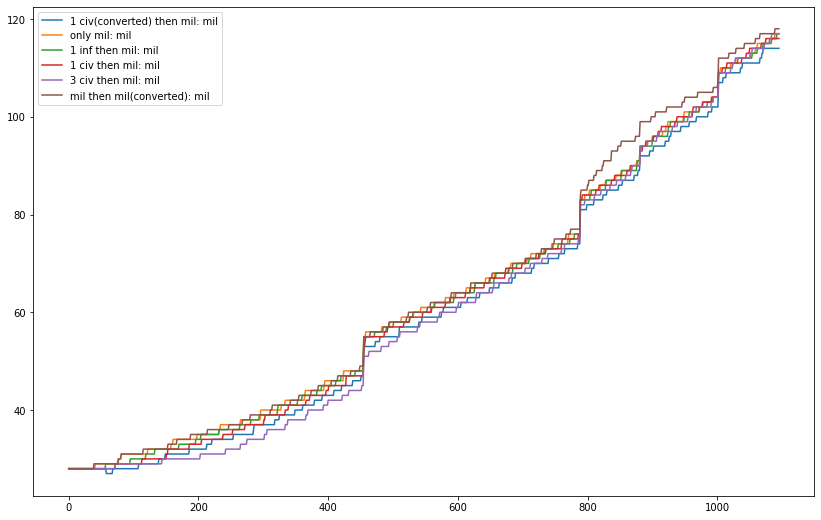

,1 civ(converted) then mil: mil,only mil: mil,1 inf then mil: mil,1 civ then mil: mil,3 civ then mil: mil,mil then mil(converted): mil
area of last 548 days,45826,47075,46844,46915,46355,48085
area of last 1096 days,66677,69107,68570,68270,66557,70132


In [20]:
calc.graph([civ_con_mil,all_mil,inf_mil,civ1_mil,civ3_mil,mil_mil_con], ['mil'],
           ['1 civ(converted) then mil', 'only mil', '1 inf then mil', '1 civ then mil', 
            '3 civ then mil','mil then mil(converted)'],
           [0.5,1])

In [22]:
#trade test
out_trade  = {1:4, 15:-4}
all_mil = calc.calculate(daily_reports, con_queue2, inf, 60, speed_mod, unique_spd_mod,
                         unique_cost_mod, free_stuff, space_mod=space_mod, con_goods=con_goods,
                        out_trade=out_trade, debug=False)

traded a civ
traded a civ
traded a civ
traded a civ
stopped trading a civ
stopped trading a civ
stopped trading a civ
stopped trading a civ
